In [1]:
import os, sys, time

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import simons_meta_data

from plotting_tools import d3, SwapPalette, SwapStyle, SwapContext


ImportError: No module named 'simons_meta_data'

In [ ]:
%matplotlib inline

# Make inline plots vector graphics instead of raster graphics
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')

# default style
sns.set_style("whitegrid")
sns.set_context("paper")

In [5]:
class Timer(object):
    
    def __init__(self, verbose=False):
        self.verbose = verbose

    def __enter__(self):
        self.start = time.time()
        return self

    def __exit__(self, *args):
        self.end = time.time()
        self.secs = self.end - self.start
        self.msecs = self.secs * 1000  # millisecs
        if self.verbose:
            print('elapsed time: {} ms'.format(self.msecs))

In [2]:
#f = open('/home/kmt/simons/faststorage/people/kmt/steps/ctools/all_x_poly.geno')
f = ['123456789', '123456789', '123456789']
geno_x_arr = np.array(list(list(map(int, line.strip())) for line in f))
geno_x_arr[ geno_x_arr == 9 ] = 0 # check that 0 means reference variant
# geno_x_arr[ geno_x_arr == 0 ] = 
# geno_x_arr[ geno_x_arr == 1 ] = 
# geno_x_arr[ geno_x_arr == 2 ] = 





In [3]:
geno_x_ar.shape()

NameError: name 'geno_x_ar' is not defined

In [7]:

np.random.seed(42) # random seed for consistency

d1, d2 = 10, 3

mu_vec1 = np.zeros(d1)
cov_mat1 = np.identity(d1)
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, d2).T
assert class1_sample.shape == (d1,d2), "The matrix has not the dimensions {}x{}".format(d1,d2)
print(class1_sample)

mu_vec2 = np.ones(d1)
cov_mat2 = np.identity(d1)
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, d2).T
assert class2_sample.shape == (d1,d2), "The matrix has not the dimensions {}x{}".format(d1,d2)
print(class2_sample)

all_samples = np.concatenate((class1_sample, class2_sample), axis=1)
assert all_samples.shape == (d1,2*d2), "The matrix has not the dimensions 3x40"
print(all_samples)

[[ 0.49671415 -0.46341769  1.46564877]
 [-0.1382643  -0.46572975 -0.2257763 ]
 [ 0.64768854  0.24196227  0.0675282 ]
 [ 1.52302986 -1.91328024 -1.42474819]
 [-0.23415337 -1.72491783 -0.54438272]
 [-0.23413696 -0.56228753  0.11092259]
 [ 1.57921282 -1.01283112 -1.15099358]
 [ 0.76743473  0.31424733  0.37569802]
 [-0.46947439 -0.90802408 -0.60063869]
 [ 0.54256004 -1.4123037  -0.29169375]]
[[ 0.39829339  1.73846658  1.32408397]
 [ 2.85227818  1.17136828  0.61491772]
 [ 0.98650278  0.88435172  0.323078  ]
 [-0.05771093  0.6988963   1.61167629]
 [ 1.82254491 -0.47852199  2.03099952]
 [-0.22084365  0.28015579  1.93128012]
 [ 1.2088636   0.53936123  0.16078248]
 [-0.95967012  2.05712223  0.69078762]
 [-0.32818605  1.34361829  1.33126343]
 [ 1.19686124 -0.76304016  1.97554513]]
[[ 0.49671415 -0.46341769  1.46564877  0.39829339  1.73846658  1.32408397]
 [-0.1382643  -0.46572975 -0.2257763   2.85227818  1.17136828  0.61491772]
 [ 0.64768854  0.24196227  0.0675282   0.98650278  0.88435172  0.323

In [8]:
def mypca(all_samples):
    # scale to mean 0 and unit var:
    col_means = all_samples.mean(axis=0)
    col_std = all_samples.std(axis=0)
    all_samples = (all_samples - col_means) / col_std
    assert np.allclose(all_samples.mean(axis=0), 0)
    assert np.allclose(all_samples.std(axis=0), 1)

    mean_vector = np.mean(all_samples, axis=1)[:, np.newaxis]

    # cov_mat = np.cov([all_samples[0,:],all_samples[1,:],all_samples[2,:]])
    cov_mat = np.cov(all_samples)

    # eigenvectors and eigenvalues for the from the covariance matrix
    eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)

    for i in range(len(eig_val_cov)):
        eigvec_cov = eig_vec_cov[:,i].reshape(1,d1).T
                
    for i in range(len(eig_val_cov)):
        eigv = eig_vec_cov[:,i].reshape(1,d1).T
        np.testing.assert_array_almost_equal(cov_mat.dot(eigv), eig_val_cov[i] * eigv,
                                             decimal=6, err_msg='', verbose=True)
        
    for ev in eig_vec_cov:
        np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
        
    # Make a list of (eigenvalue, eigenvector) tuples
    eig_pairs = [(np.abs(eig_val_cov[i]), eig_vec_cov[:,i]) for i in range(len(eig_val_cov))]

    # Sort the (eigenvalue, eigenvector) tuples from high to low
    eig_pairs.sort()
    eig_pairs.reverse()

    # Visually confirm that the list is correctly sorted by decreasing eigenvalues
    for i in eig_pairs:
        print(i[0])
        
    matrix_w = np.hstack((eig_pairs[0][1].reshape(d1,1), eig_pairs[1][1].reshape(d1,1)))
    # print('Matrix W:\n', matrix_w)
    
    transformed = matrix_w.T.dot(all_samples)
    assert transformed.shape == (2,2*d2), "The matrix is not 2x40 dimensional."
    
    return transformed, eig_pairs

with Timer(verbose=True):
    transformed, eig_pairs = mypca(all_samples)

elapsed time: 99.12610054016113 ms


AssertionError: 
Arrays are not almost equal to 6 decimals

(mismatch 100.0%)
 x: array(1.0)
 y: array(0.9776558345231957)

1.74681152877
1.54194361217
1.31740759449
1.18512654394
1.08210163085
0.966459956002
0.863111835322
0.798706696433
0.595384807073
0.0
elapsed time: 18.300533294677734 ms


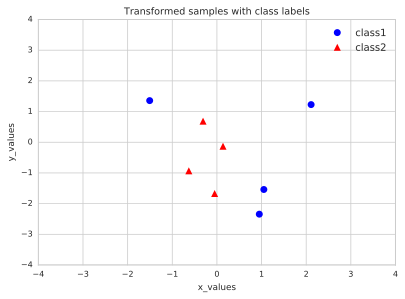

In [34]:
plt.plot(transformed[0,0:4], transformed[1,0:4], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed[0,4:8], transformed[1,4:8], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()

In [15]:
# scale to mean 0 and unit var:
col_means = all_samples.mean(axis=0)
col_std = all_samples.std(axis=0)
all_samples = (all_samples - col_means) / col_std
assert np.allclose(all_samples.mean(axis=0), 0)
assert np.allclose(all_samples.std(axis=0), 1)

mean_vector = np.mean(all_samples, axis=1)[:, np.newaxis]
#print('Mean Vector:\n')
#print(mean_vector)

# cov_mat = np.cov([all_samples[0,:],all_samples[1,:],all_samples[2,:]])
cov_mat = np.cov(all_samples)
#print('Covariance Matrix:')
#print(cov_mat)

# eigenvectors and eigenvalues for the from the covariance matrix
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)

for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:,i].reshape(1,d1).T
    print('Eigenvector {}: \n{}'.format(i+1, eigvec_cov))
    print('Eigenvalue {} from covariance matrix: {}'.format(i+1, eig_val_cov[i]))
    print(40 * '-')

Eigenvector 1: 
[[-0.42329455]
 [-0.39301486]
 [ 0.81630941]]
Eigenvalue 1 from covariance matrix: 2.018511531271899
----------------------------------------
Eigenvector 2: 
[[-0.69820369]
 [ 0.71568568]
 [-0.01748199]]
Eigenvalue 2 from covariance matrix: 0.4784990322143303
----------------------------------------
Eigenvector 3: 
[[ 0.57735027]
 [ 0.57735027]
 [ 0.57735027]]
Eigenvalue 3 from covariance matrix: 9.701644618597543e-17
----------------------------------------


In [16]:
for i in range(len(eig_val_cov)):
    eigv = eig_vec_cov[:,i].reshape(1,d1).T
    np.testing.assert_array_almost_equal(cov_mat.dot(eigv), eig_val_cov[i] * eigv,
                                         decimal=6, err_msg='', verbose=True)

In [17]:
for ev in eig_vec_cov:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))

In [18]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val_cov[i]), eig_vec_cov[:,i]) for i in range(len(eig_val_cov))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i[0])

2.01851153127
0.478499032214
9.7016446186e-17


In [19]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(d1,1), eig_pairs[1][1].reshape(d1,1)))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.42329455 -0.69820369]
 [-0.39301486  0.71568568]
 [ 0.81630941 -0.01748199]]


In [20]:
transformed = matrix_w.T.dot(all_samples)
assert transformed.shape == (2,2*d2), "The matrix is not 2x40 dimensional."

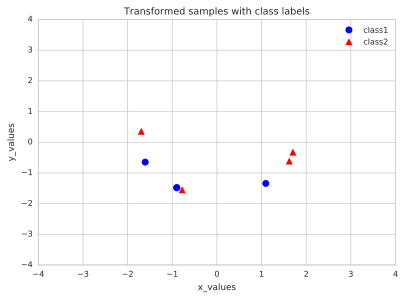

In [21]:
#%matplotlib inline
#from matplotlib import pyplot as plt

plt.plot(transformed[0,0:4], transformed[1,0:4], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed[0,4:8], transformed[1,4:8], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()

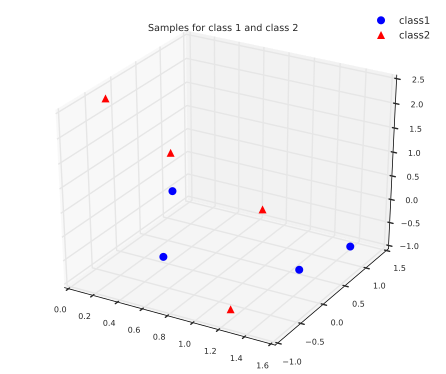

In [22]:

from mpl_toolkits.mplot3d import axes3d, Axes3D #<-- Note the capitalization! 

fig = plt.figure(figsize=(6,5))
#ax = fig.add_subplot(111, projection='3d')
ax = Axes3D(fig)

plt.rcParams['legend.fontsize'] = 10   
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:], 'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:], '^', markersize=8, alpha=0.5, color='red', label='class2')

plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')

plt.show()

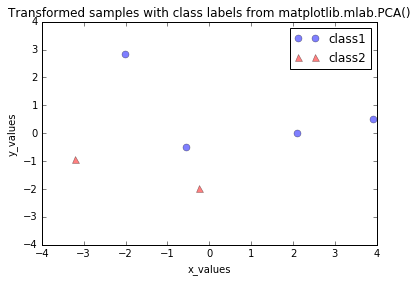

In [9]:
from sklearn.decomposition import PCA as sklearnPCA

sklearn_pca = sklearnPCA(n_components=2)
sklearn_transf = sklearn_pca.fit_transform(all_samples.T)

plt.plot(sklearn_transf[0:4,0],sklearn_transf[0:4,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(sklearn_transf[4:8,0], sklearn_transf[4:8,1], '^', markersize=7, color='red', alpha=0.5, label='class2')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples with class labels from matplotlib.mlab.PCA()')

plt.show()

In [16]:
import numpy as np
from sklearn.decomposition import PCA
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca = PCA()
pca.fit(X)


print(pca.explained_variance_ratio_)  

#print(pca.singular_values_)  

[ 0.99244289  0.00755711]


In [15]:
pca = PCA(n_components=2, svd_solver='full')
pca.fit(X)                 


print(pca.explained_variance_ratio_)  

[ 0.99244289  0.00755711]
